In [6]:
import xml.etree.ElementTree as ET
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from pathlib import Path
import random
import glob
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
image_path = '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/images'
mask_path  = '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks'

In [8]:
def display_image(image_folder):

    image_files = [f for f in (os.listdir(image_folder)) if f.endswith(('jpg','png','jpeg'))]

    #print(image_files)

    fig,axes = plt.subplots(3,3,figsize=(10,10))

    for i, file_name in enumerate(image_files):

        if i>=9:
            break
        row = i//3
        col = i%3

         # Load and display the image in the current subplot
        image_path = os.path.join(image_folder, file_name)
        image = cv2.imread(image_path)
        axes[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[row, col].set_title(file_name)
        axes[row, col].axis('off')


    # Ensure proper layout and show the plots
    plt.tight_layout()
    plt.show()


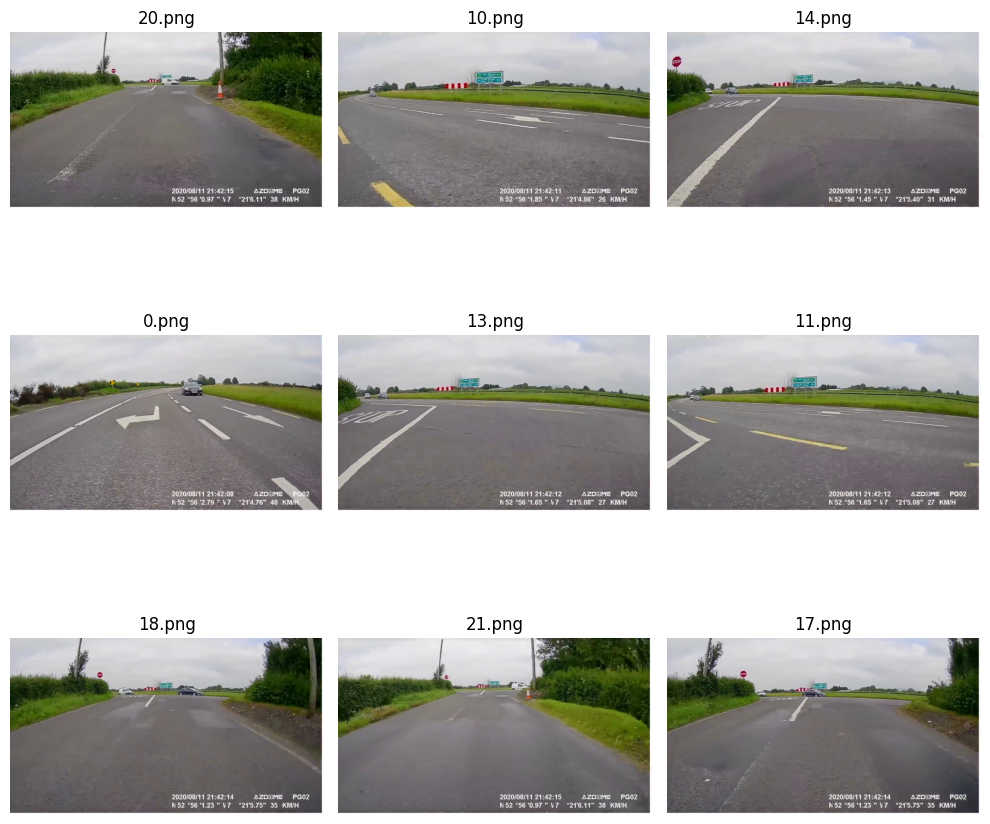

In [9]:
# Specify the folder path containing the images
image_folder = '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/images'  # Replace with the path to your image folder
display_image(image_folder)

In [10]:
def mask_image(image_folder):

    image_files = [f for f in (os.listdir(image_folder)) if f.endswith(('jpg','png','jpeg'))]

    #print(image_files)

    fig,axes = plt.subplots(3,3,figsize=(10,10))

    for i, file_name in enumerate(image_files):

        if i>=9:
            break
        row = i//3
        col = i%3

         # Load and display the image in the current subplot
        image_path = os.path.join(image_folder, file_name)
        image = cv2.imread(image_path)
        axes[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[row, col].set_title(file_name)
        axes[row, col].axis('off')


    # Ensure proper layout and show the plots
    plt.tight_layout()
    plt.show()

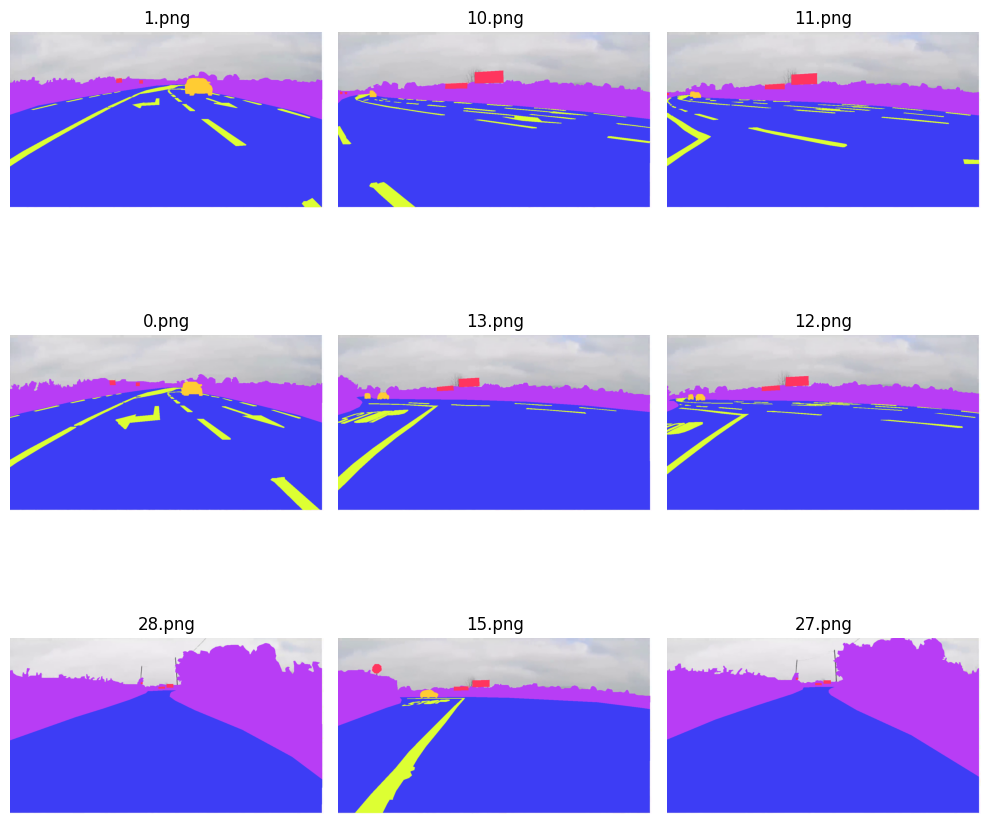

In [11]:
image_folder = '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks'
mask_image(image_folder)

In [12]:
image_path = "/content/drive/MyDrive/Road Segment Data/Road_Segmentation/images/*.png"
mask_path = "/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/*.png"
image_paths = sorted(glob.glob(image_path), key=lambda x: x.split('.')[0])
mask_paths = sorted(glob.glob(mask_path), key=lambda x: x.split('.')[0])

In [13]:
mask_paths

['/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/0.png',
 '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/1.png',
 '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/10.png',
 '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/11.png',
 '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/12.png',
 '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/13.png',
 '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/14.png',
 '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/15.png',
 '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/16.png',
 '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/17.png',
 '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/18.png',
 '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/19.png',
 '/content/drive/MyDrive/Road Segment Data/Road_Segmentation/masks/2.png',
 '/content/driv

In [14]:
def resize_image(image, size):
    # Resize the image to the specified size
    resized_image = cv2.resize(image, size)
    return resized_image

def resize_mask(mask, size):
    # Convert the mask to grayscale
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    resized_mask = cv2.resize(mask_gray, size, interpolation=cv2.INTER_NEAREST)
    resized_mask = np.expand_dims(resized_mask, axis=2)
    return resized_mask

In [15]:
# Define the desired size
target_size = (512,512)
image_list = []

for image_path in image_paths:
  # Load the image and mask
  image = plt.imread(image_path).astype(np.float32)
  #mask = plt.imread(mask_path).astype(np.float32)


  # Resize the image and mask
  resized_image = resize_image(image, target_size)
  #resized_mask = resize_mask(mask, target_size)

  image_list.append(resized_image)
  #mask_list.append(resized_mask)

# Convert the image and mask lists to arrays
image_array = np.array(image_list)
#mask_array = np.array(mask_list)

In [16]:
mask_list = []
for mask_path in mask_paths:
  # Load the image and mask
  #image = plt.imread(image_path).astype(np.float32)
  mask = plt.imread(mask_path).astype(np.float32)


  # Resize the image and mask
  #resized_image = resize_image(image, target_size)
  resized_mask = resize_mask(mask, target_size)

  #image_list.append(resized_image)
  mask_list.append(resized_mask)

# Convert the image and mask lists to arrays
#image_array = np.array(image_list)
mask_array = np.array(mask_list)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_array,mask_array, test_size=0.2, random_state=23)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential

In [23]:
def upsample(filters, size, strides, dropout=None):
    """Upsample the input"""

    initializer = tf.random_normal_initializer(0., 0.02)

    result = Sequential()
    result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=strides,
                                      padding="same",
                                      kernel_initializer=initializer,
                                      use_bias=False))
    result.add(tf.keras.layers.BatchNormalization())
    if dropout:
        result.add(tf.keras.layers.Dropout(dropout))
    result.add(tf.keras.layers.ReLU())
    return result

In [24]:
from tensorflow.keras.applications import VGG19

base_model = VGG19(input_shape=[512,512] + [3], include_top=False, weights="imagenet")

layers_names = [
    "block2_conv1",    # 256x256
    "block2_conv2",    # 256x256
    "block3_conv1",    # 128x128
    "block3_conv2",    # 128x128
    "block4_conv1",    # 64x64
    "block4_conv2",    # 64x64
    "block5_conv1",    # 32x32
]

layers = [base_model.get_layer(name).output for name in layers_names]
down_stack = Model(inputs=base_model.input, outputs=layers)
down_stack.trainable = False

up_stack = [
    upsample(512, 3, 1),   # 32x32 -> 32x32
    upsample(512, 3, 2),   # 32x32 -> 64x64
    upsample(256, 3, 1),   # 64x64 -> 64x64
    upsample(256, 3, 2),   # 64x64 -> 128x128
    upsample(128, 3, 1),   # 128x128 -> 128x128
    upsample(128, 3, 2),   # 128x128 -> 256x256
]

In [26]:
keras.backend.clear_session()

def unet_generator(output_channels=1):
    inputs = tf.keras.layers.Input(shape=[512,512] + [3])
    x = inputs

    initializer = tf.random_normal_initializer(0., 0.02)
    output = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2, activation='sigmoid',
        padding="same", kernel_initializer=initializer
    )

    concat = tf.keras.layers.Concatenate()

    # Downsampling
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connection
    for up, skip in zip (up_stack, skips):
        x = up(x)
        if up.layers[0].strides == (2, 2):
            concat = tf.keras.layers.Concatenate()
            x = concat([x, skip])

    x = output(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

model = unet_generator()

In [27]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4,
                                                    restore_best_weights=True)

In [31]:
IMG_SIZE = [512, 512]
def visualize(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(IMG_SIZE[0],IMG_SIZE[1],1)
    visualize([sample_image, sample_mask, pred_mask])

Epoch 1/300
1/1 [==============================] - 6s 6s/step - loss: 0.5931 - accuracy: 0.0024 - val_loss: 0.6240 - val_accuracy: 0.0020
Epoch 2/300
1/1 [==============================] - 2s 2s/step - loss: 0.6057 - accuracy: 0.0024 - val_loss: 0.6142 - val_accuracy: 0.0020
Epoch 3/300
1/1 [==============================] - 2s 2s/step - loss: 0.6051 - accuracy: 0.0024 - val_loss: 0.6078 - val_accuracy: 0.0020
Epoch 4/300
1/1 [==============================] - 2s 2s/step - loss: 0.6004 - accuracy: 0.0024 - val_loss: 0.6072 - val_accuracy: 0.0020
Epoch 5/300
1/1 [==============================] - 2s 2s/step - loss: 0.6024 - accuracy: 0.0024 - val_loss: 0.6096 - val_accuracy: 0.0020
Epoch 6/300
1/1 [==============================] - 2s 2s/step - loss: 0.5998 - accuracy: 0.0024 - val_loss: 0.6160 - val_accuracy: 0.0020
Epoch 7/300
1/1 [==============================] - 2s 2s/step - loss: 0.5970 - accuracy: 0.0024 - val_loss: 0.6214 - val_accuracy: 0.0020
Epoch 8/300
1/1 [=================

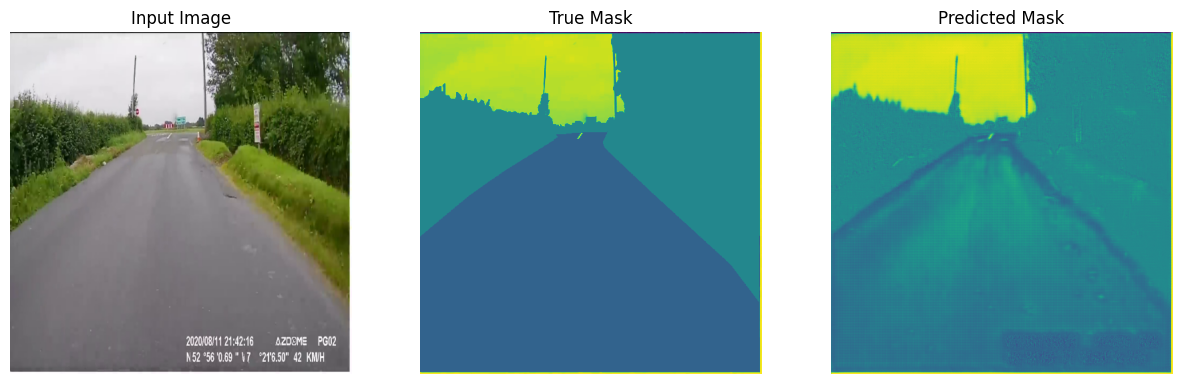

Epoch 50/300
1/1 [==============================] - 2s 2s/step - loss: 0.5933 - accuracy: 0.0024 - val_loss: 0.6111 - val_accuracy: 0.0020
Epoch 51/300
1/1 [==============================] - 2s 2s/step - loss: 0.5932 - accuracy: 0.0024 - val_loss: 0.6101 - val_accuracy: 0.0020
Epoch 52/300
1/1 [==============================] - 2s 2s/step - loss: 0.5932 - accuracy: 0.0024 - val_loss: 0.6083 - val_accuracy: 0.0020
Epoch 53/300
1/1 [==============================] - 2s 2s/step - loss: 0.5932 - accuracy: 0.0024 - val_loss: 0.6071 - val_accuracy: 0.0020
Epoch 54/300
1/1 [==============================] - 2s 2s/step - loss: 0.5932 - accuracy: 0.0024 - val_loss: 0.6068 - val_accuracy: 0.0020
Epoch 55/300
1/1 [==============================] - 2s 2s/step - loss: 0.5932 - accuracy: 0.0024 - val_loss: 0.6070 - val_accuracy: 0.0020
Epoch 56/300
1/1 [==============================] - 2s 2s/step - loss: 0.5931 - accuracy: 0.0024 - val_loss: 0.6068 - val_accuracy: 0.0020
Epoch 57/300
1/1 [=========

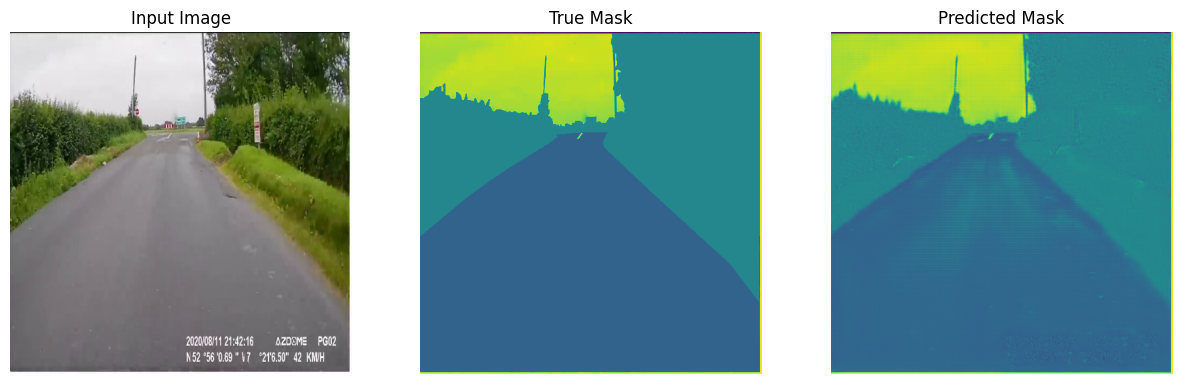

Epoch 100/300
1/1 [==============================] - 2s 2s/step - loss: 0.5928 - accuracy: 0.0024 - val_loss: 0.6003 - val_accuracy: 0.0020
Epoch 101/300
1/1 [==============================] - 2s 2s/step - loss: 0.5928 - accuracy: 0.0024 - val_loss: 0.6003 - val_accuracy: 0.0020
Epoch 102/300
1/1 [==============================] - 2s 2s/step - loss: 0.5928 - accuracy: 0.0024 - val_loss: 0.6004 - val_accuracy: 0.0020
Epoch 103/300
1/1 [==============================] - 2s 2s/step - loss: 0.5928 - accuracy: 0.0024 - val_loss: 0.6004 - val_accuracy: 0.0020
Epoch 104/300
1/1 [==============================] - 2s 2s/step - loss: 0.5928 - accuracy: 0.0024 - val_loss: 0.6003 - val_accuracy: 0.0020
Epoch 105/300
1/1 [==============================] - 2s 2s/step - loss: 0.5928 - accuracy: 0.0024 - val_loss: 0.6003 - val_accuracy: 0.0020
Epoch 106/300
1/1 [==============================] - 2s 2s/step - loss: 0.5927 - accuracy: 0.0024 - val_loss: 0.6003 - val_accuracy: 0.0020
Epoch 107/300
1/1 [=

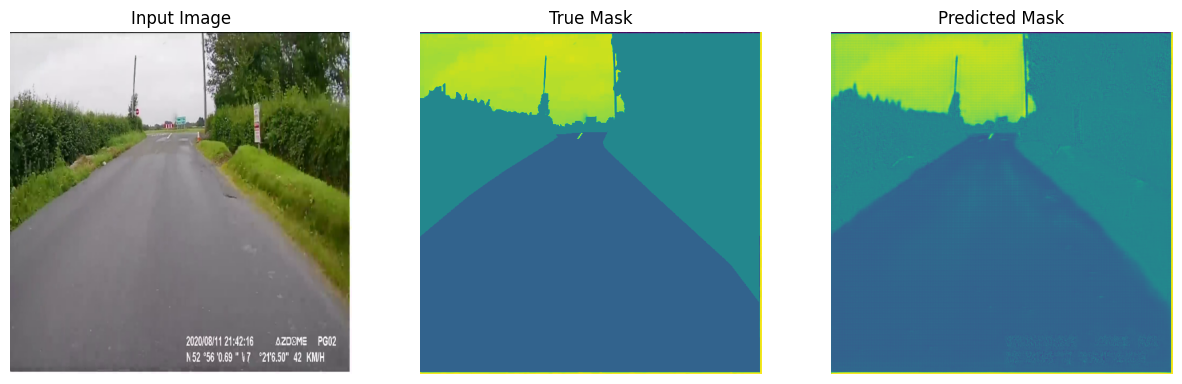

Epoch 150/300
1/1 [==============================] - 2s 2s/step - loss: 0.5924 - accuracy: 0.0024 - val_loss: 0.6000 - val_accuracy: 0.0020
Epoch 151/300
1/1 [==============================] - 2s 2s/step - loss: 0.5924 - accuracy: 0.0024 - val_loss: 0.6003 - val_accuracy: 0.0020
Epoch 152/300
1/1 [==============================] - 2s 2s/step - loss: 0.5924 - accuracy: 0.0024 - val_loss: 0.6001 - val_accuracy: 0.0020
Epoch 153/300
1/1 [==============================] - 2s 2s/step - loss: 0.5924 - accuracy: 0.0024 - val_loss: 0.6001 - val_accuracy: 0.0020
Epoch 154/300
1/1 [==============================] - 2s 2s/step - loss: 0.5924 - accuracy: 0.0024 - val_loss: 0.6003 - val_accuracy: 0.0020
Epoch 155/300
1/1 [==============================] - 2s 2s/step - loss: 0.5924 - accuracy: 0.0024 - val_loss: 0.6003 - val_accuracy: 0.0020
Epoch 156/300
1/1 [==============================] - 2s 2s/step - loss: 0.5924 - accuracy: 0.0024 - val_loss: 0.6001 - val_accuracy: 0.0020
Epoch 157/300
1/1 [=

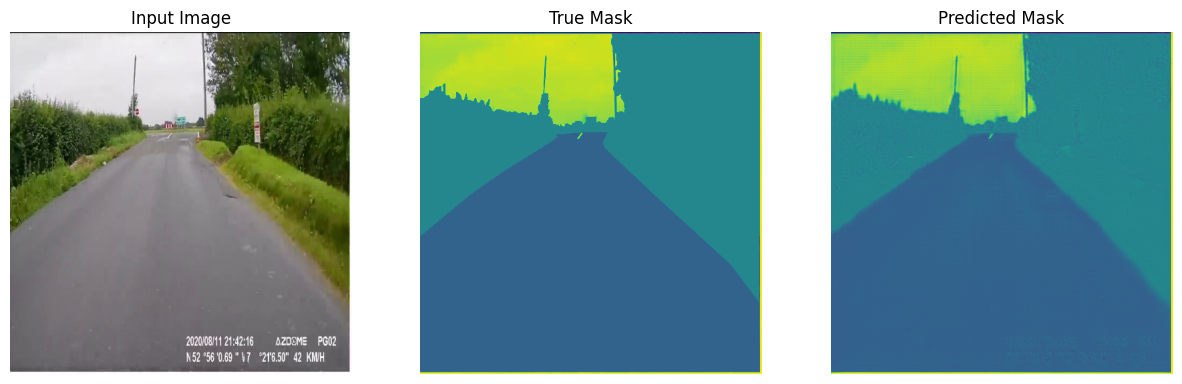

Epoch 200/300
1/1 [==============================] - 2s 2s/step - loss: 0.5925 - accuracy: 0.0024 - val_loss: 0.6017 - val_accuracy: 0.0020
Epoch 201/300
1/1 [==============================] - 2s 2s/step - loss: 0.5923 - accuracy: 0.0024 - val_loss: 0.6006 - val_accuracy: 0.0020
Epoch 202/300
1/1 [==============================] - 2s 2s/step - loss: 0.5923 - accuracy: 0.0024 - val_loss: 0.6007 - val_accuracy: 0.0020
Epoch 203/300
1/1 [==============================] - 2s 2s/step - loss: 0.5925 - accuracy: 0.0024 - val_loss: 0.6015 - val_accuracy: 0.0020
Epoch 204/300
1/1 [==============================] - 2s 2s/step - loss: 0.5924 - accuracy: 0.0024 - val_loss: 0.6007 - val_accuracy: 0.0020
Epoch 205/300
1/1 [==============================] - 2s 2s/step - loss: 0.5923 - accuracy: 0.0024 - val_loss: 0.6005 - val_accuracy: 0.0020
Epoch 206/300
1/1 [==============================] - 2s 2s/step - loss: 0.5924 - accuracy: 0.0024 - val_loss: 0.6003 - val_accuracy: 0.0020
Epoch 207/300
1/1 [=

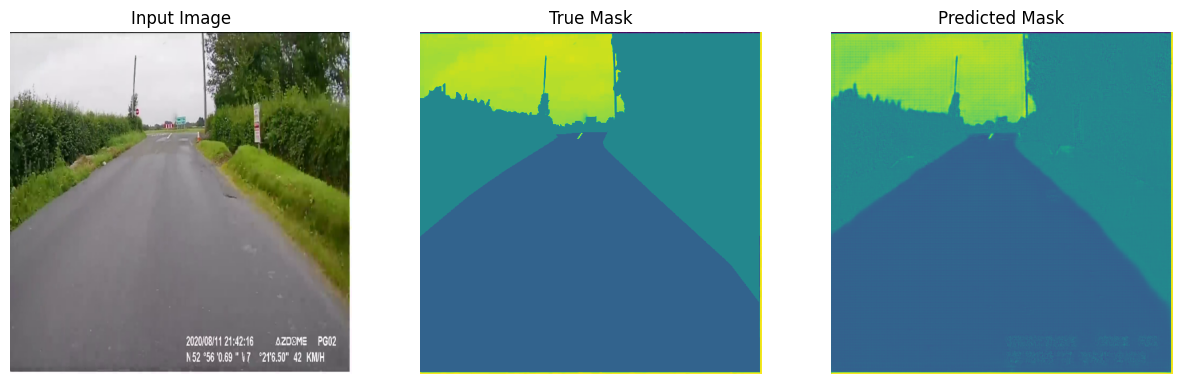

Epoch 250/300
1/1 [==============================] - 2s 2s/step - loss: 0.5920 - accuracy: 0.0024 - val_loss: 0.6026 - val_accuracy: 0.0020
Epoch 251/300
1/1 [==============================] - 2s 2s/step - loss: 0.5920 - accuracy: 0.0024 - val_loss: 0.6020 - val_accuracy: 0.0020
Epoch 252/300
1/1 [==============================] - 2s 2s/step - loss: 0.5920 - accuracy: 0.0024 - val_loss: 0.6024 - val_accuracy: 0.0020
Epoch 253/300
1/1 [==============================] - 2s 2s/step - loss: 0.5920 - accuracy: 0.0024 - val_loss: 0.6035 - val_accuracy: 0.0020
Epoch 254/300
1/1 [==============================] - 2s 2s/step - loss: 0.5920 - accuracy: 0.0024 - val_loss: 0.6023 - val_accuracy: 0.0020
Epoch 255/300
1/1 [==============================] - 2s 2s/step - loss: 0.5919 - accuracy: 0.0024 - val_loss: 0.6021 - val_accuracy: 0.0020
Epoch 256/300
1/1 [==============================] - 2s 2s/step - loss: 0.5919 - accuracy: 0.0024 - val_loss: 0.6030 - val_accuracy: 0.0020
Epoch 257/300
1/1 [=

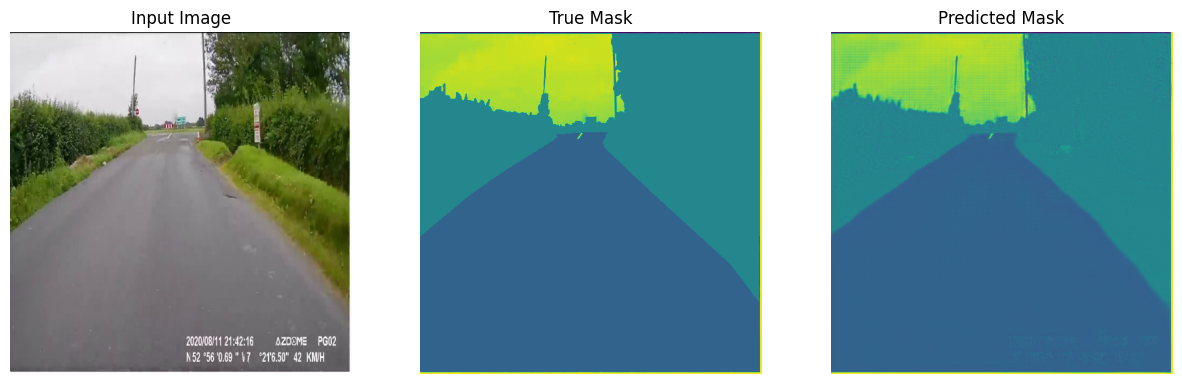

Epoch 300/300
1/1 [==============================] - 2s 2s/step - loss: 0.5917 - accuracy: 0.0024 - val_loss: 0.6033 - val_accuracy: 0.0020


In [38]:

epochs = 300

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if (epoch + 1) % 50 == 0:
            show_predictions(X_test[0], y_test[0])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model_history = model.fit(X_train,y_train, epochs=epochs,
                          validation_data=(X_test, y_test),
                          callbacks=[DisplayCallback()])

1/1 [==============================] - 0s 36ms/step


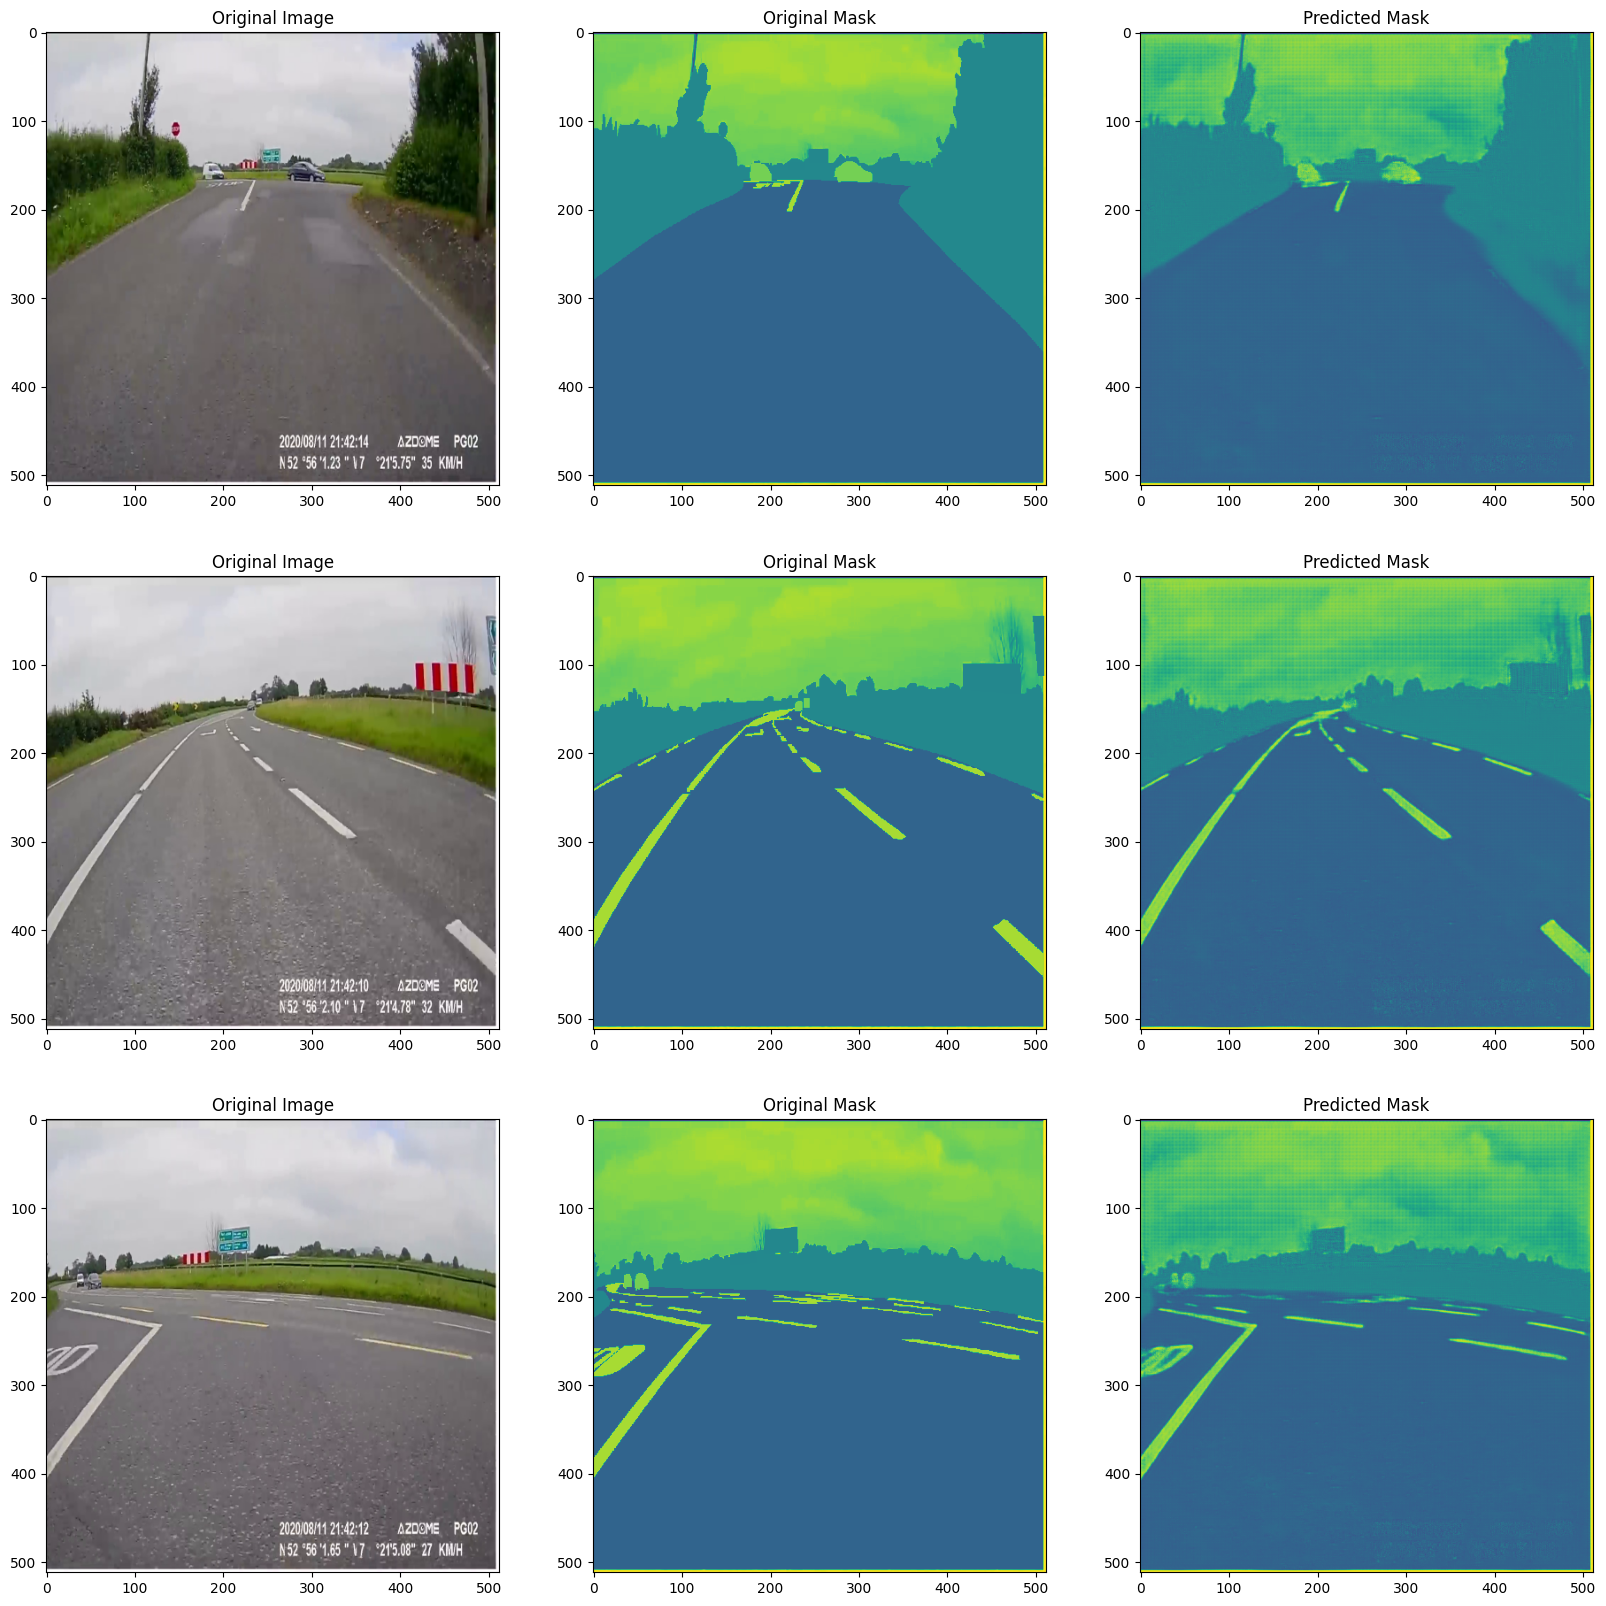

In [42]:
figure, axes = plt.subplots(3,3, figsize=(20,20))

for i in range(0,3):
    rand_num = random.randint(0,5)
    original_img = X_test[rand_num]
    axes[i,0].imshow(original_img)
    axes[i,0].title.set_text('Original Image')

    original_mask = y_test[rand_num]
    axes[i,1].imshow(original_mask)
    axes[i,1].title.set_text('Original Mask')

    original_img = np.expand_dims(original_img, axis=0)
    predicted_mask = model.predict(original_img).reshape(512,512)
    axes[i,2].imshow(predicted_mask)
    axes[i,2].title.set_text('Predicted Mask')